# Predictive Insights into Heart Health: Investigating the Framingham Heart Study Dataset

Boyang Su

### Getting to know Framingham study
*“One of the first long-term cohort studies of its kind, the NIH's Framingham Heart Study is considered the crown jewel of epidemiology."*  ––– [The National Institutes of Health](https://www.nih.gov/sites/default/files/about-nih/impact/framingham-heart-study.pdf)  

#### Backgroud and Cohort
In the early 1900s, heart diseases has long been the #1 cause of death in the United States. The Framingham Heart Study, launched in 1948, is a long-term research project that was developed to identify risk factors for cardiovascular disease.

The project was named after Framingham, a town in Massachusetts chosen as the study site. The initial cohort included over 5,200 Framingham residents aged 30 to 62 without heart disease symptoms. Regular medical tests and lifestyle data were collected to observe disease development and connections to heart health over time.

A notable aspect of the study was its inclusion of over half women in the original cohort. This diverse representation prompted a shift in perspective, challenging the notion of heart disease as a man's disease. Acknowledging the necessity to encompass broader demographics, researchers introduced the Omni Cohort in 1994 of 507 men and women, including African-American, Hispanic, Asian, and Native American descent. A subsequent enrollment in 2003 further expanded the Omni participants, aiming to capture the heart health profiles of a more varied population ([Reference](https://www.nhlbi.nih.gov/science/framingham-heart-study-fhs#:~:text=FHS%20findings%20have%20informed%20the,risk%20factors%20for%20cardiovascular%20disease.)).

#### Findings and Impacts
The study's findings have contributed significantly to our understanding of heart disease, its risk factors, and the importance of prevention and early intervention. Notably, the implementation of treatments for hypertension, cholesterol reduction, and smoking cessation has contributed to a substantial 50-year decrease in cardiovascular deaths. Between 1969 and 2013, the United States witnessed a remarkable 67.5% reduction in deaths due to heart disease and a 77% reduction in stroke-related deaths. ([Reference](https://www.nih.gov/sites/default/files/about-nih/impact/framingham-heart-study.pdf)).

<center>
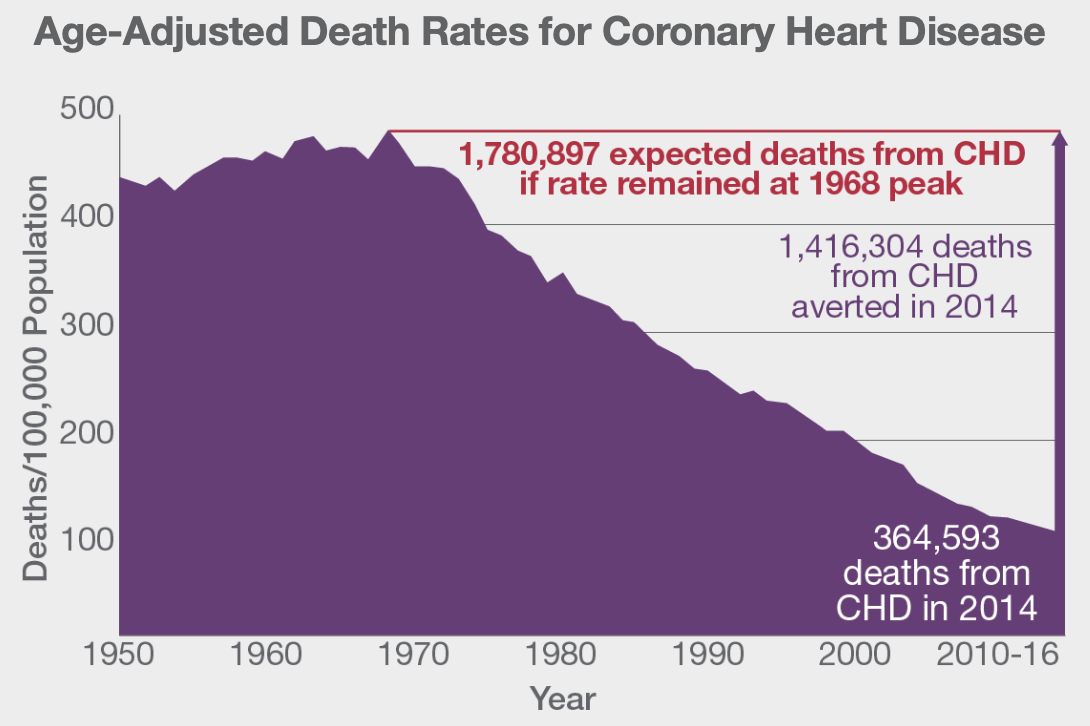
</center>
    
Over the past century, the study has yielded around 3,000 articles in leading medical journals ([Reference](https://www.nhlbi.nih.gov/science/framingham-heart-study-fhs#:~:text=FHS%20findings%20have%20informed%20the,risk%20factors%20for%20cardiovascular%20disease.)).  Being one of the earliest longitudinal cohort studies, Framingham has sparked the initiation of numerous longitudinal cohort studies worldwide, and epidemiological tools are now widely employed for comprehending chronic conditions. Furthermore, the study's influence has extended to diverse fields including cancer, stroke, diabetes, and genetics([Reference](https://www.britannica.com/event/Framingham-Heart-Studay)). The Framingham Heart Study's extensive contributions have left an indelible mark on scientific research and public health policies, fostering a better understanding of heart health and strategies for disease prevention.


### Notebook Outline
In this Jupyter notebook, we'll delve into the Framingham dataset, analyzing its contents, performing exploratory data analysis, and leveraging linear and logistic regression.

Let's see what insights into cardiovascular disease risk factors we can uncover through our exploration!

## 0. BRH Setup and Import Libraries

This notebook should be run in the [Workspace](https://brh.data-commons.org/workspace) on BRH. To use the Workspace, you need to login and request for Workspace access [here](https://brh.data-commons.org/workspace/request-access).

The Framingham dataset is provided by BioDataCatalyst (BDC) Data Commons. Before starting to run the code in the notebook on Workspace, you need to make sure you have authorized BDC Login through the [profile page](https://brh.data-commons.org/identity).

Next, we import necessary libraries:
- **[pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide):** is a library for data manipulation and analysis, providing tools to handle structured data through its DataFrame and Series data structures
- **[numpy](https://numpy.org/doc/stable/user/index.html#user):** is a fundamental library for numerical computations in Python, offering support for arrays, matrices, and mathematical functions
- **[pyreadstat](https://github.com/Roche/pyreadstat)**: allows you to use it for reading and writing data files in the SPSS format
- **[seaborn](https://seaborn.pydata.org/tutorial.html):** is a statistical data visualization library built on Matplotlib, designed to create visually appealing and informative visualizations with ease
- **[matplotlib](https://matplotlib.org/stable/users/index.html):** is a widely-used data visualization library that enables the creation of static, interactive, and publication-quality plots and charts
- **[statsmodels](https://www.statsmodels.org/stable/user-guide.html#):** is a library focused on statistical modeling and hypothesis testing, providing tools for fitting and analyzing various statistical models
- **[sklearn](https://scikit-learn.org/0.21/user_guide.html) (Scikit-learn):** is a comprehensive machine learning library that covers a wide range of algorithms and techniques for tasks such as classification, regression, clustering, and more

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Modules for regression
import statsmodels.api as sm  # For statistical models
from statsmodels.sandbox.regression.predstd import wls_prediction_std # For prediction interval
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.model_selection import train_test_split  # For data splitting
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation

## 1. Import Data Set and Data Cleaning

Import the data set. `fram_df` is a pandas DataFrame, while `fram_meta` is a metadata object. For more information on metadata object, please refer to [here](https://ofajardo.github.io/pyreadstat_documentation/_build/html/index.html#metadata-object-description).

In [ ]:
!gen3 --commons_url gen3.biodatacatalyst.nhlbi.nih.gov drs-pull object dg.4503/c97507dd-bb79-45ce-9186-3d14ad823f81

# Read data from "frmgham2.sav" file using pyreadstat library
fram_df, fram_meta = pyreadstat.read_sav("frmgham2.sav", apply_value_formats=True)

# Display the first few rows of the DataFrame
fram_df.head()

The data set contains 39 columns and 11627 rows.

In [ ]:
# Set option to display all columns in DataFrame
pd.set_option('display.max_columns', None)

# Print the shape (rows, columns) of the DataFrame
fram_df.shape

Next, we check the data types in each column.

In [ ]:
fram_df.dtypes

The data type for all columns is float. In order to understand what the column variables mean, we can look at a field of the metadata, `column_names_to_labels`. More detailed explanation on variables of Framingham study can be found [here](https://biolincc.nhlbi.nih.gov/media/teachingstudies/FHS_Teaching_Longitudinal_Data_Documentation_2021a.pdf).

In [ ]:
fram_meta.column_names_to_labels

We observe that we have
- categorical variables: 'SEX', 'CURSMOKE', 'DIABETES', 'BPMEDS', 'EDUC', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'PERIOD', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN'
- numerical variables: 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE', 'TIME', 'HDLC', 'LDLC', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'

Besides 'SEX' and 'EDUC', other categorical variables have `0` indicating "NO" and `1` indicating "YES". To ensure clarity and readability, we narrow our focus to the DataFrame containing only the columns relevant to our study. Furthermore, we create an additional column to provide an explanation for the 'SEX' column.

In [ ]:
# Select specific columns from the DataFrame
fram_df = fram_df[['RANDID', 'SEX', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI', 'TOTCHOL', 'HDLC', 'LDLC', 'GLUCOSE', 'DIABETES',
                   'PERIOD', 'DEATH', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN']]
# Create a mapping dictionary for converting numeric gender values to labels
sexMap = {1: 'Male', 2: 'Female'}
# Add a new 'GENDER' column based on the 'SEX' column using the mapping dictionary
new_col = fram_df['SEX'].map(sexMap)
fram_df['GENDER'] = new_col

Given the longitudinal nature of the study, each participant underwent three tests, spaced two years apart, unless they dropped out for various reasons. To facilitate analysis, we segment the `fram_df` into three distinct DataFrames based on the `PERIOD` column. The resulting DataFrames, named `fram_1`, `fram_2`, and `fram_3`, correspondingly contain the data pertaining to the first, second, and third tests.

In [ ]:
fram_1 = fram_df[fram_df['PERIOD']==1]
fram_2 = fram_df[fram_df['PERIOD']==2]
fram_3 = fram_df[fram_df['PERIOD']==3]

For each period, the `RANDID` column should have no duplicates.

In [ ]:
print('There are '+ str(fram_1['RANDID'].duplicated().sum())+' duplicates for period 1')
print('There are '+ str(fram_2['RANDID'].duplicated().sum())+' duplicates for period 2')
print('There are '+ str(fram_3['RANDID'].duplicated().sum())+' duplicates for period 3')

## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a preliminary step in data analysis, involving visually and statistically examining a dataset. Through techniques such as summary statistics, data visualization, and distribution analysis, EDA helps to identify anomalies, trends, and potential correlations within the data. These results will help us in formulating hypotheses, refining data preprocessing strategies, and choosing the appropriate model.

Let's start with generating a summary statistics table for `fram_df`. The `.describe()` method calculates various statistics for each numerical column in the DataFrame. The `.T` at the end transposes the table, making columns appear as rows and providing a more readable format where statistics are displayed vertically.

In [ ]:
fram_df.describe().T

Next, we can draw box plots for the numerical values to visualize the chart above.
- The box represents the interquartile range (IQR), containing the middle 50% of the data.
- The line inside the box represents the median value.
- Whiskers extend to the data range within a certain distance from the box, indicating the spread of the data.
- Dots or circles outside the whiskers represent potential outliers.

In [ ]:
# Melt the DataFrame for specific variables
df_melted_1 = fram_df.melt(var_name='Variables', value_name='Values', value_vars=['TOTCHOL', 'HDLC', 'LDLC', 'GLUCOSE'])
df_melted_2 = fram_df.melt(var_name='Variables', value_name='Values', value_vars=['AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI'])

# Create a subplot with two columns for side-by-side plots
plt.figure(figsize=(10, 5))

# Plot the first box plot on the left side
plt.subplot(1, 2, 1)
sns.boxplot(x='Variables', y='Values', data=df_melted_1, palette='Pastel2')
plt.title('Box Plot for Serum Total Cholesterol, High Density\n Lipoprotein Cholesterol, Low Density Lipoprotein\n Cholesterol, and Casual serum glucose')
plt.xlabel('Variables')
plt.ylabel('Values')

# Plot the second box plot on the right side
plt.subplot(1, 2, 2)
sns.boxplot(x='Variables', y='Values', data=df_melted_2, palette='Pastel1')
plt.title('Box Plot for Age, Systolic Blood Pressure, Diastolic\n Blood Pressure, Number of cigarettes smoked each day,\n Body Mass Index, and Heart rate')
plt.xlabel('Variables')
plt.ylabel('Values')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

From the box plots above, several variables exhibit a long-tail distribution. This suggests there might be outliers, which we might want to remove later before we start building our models.

Next, we draw a few histograms to visualize the distributions of `AGE`, `BMI`, `SYSBP`, `TOTCHOL`. We will create a set of three side-by-side histograms, each representing the distribution during different periods, while also showing the distribution for males and females using bars with different colors.

In [ ]:
# Create a figure with 1 row and 3 columns of subplots, sharing the same x and y axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Arrange the DataFrames for each period and sort them by gender
data_frames = [fram_1.sort_values(by=['GENDER']), fram_2.sort_values(by=['GENDER']), fram_3.sort_values(by=['GENDER'])]

# Titles for the subplots
titles = ['Period 1', 'Period 2', 'Period 3']

# Loop through the data frames and corresponding axes
for i, df in enumerate(data_frames):
    # Create a histogram plot with stacked bars for different genders, and overlay KDE
    sns.histplot(data=df, x='AGE', hue='GENDER', palette='viridis', multiple='stack', edgecolor='white', ax=axes[i], bins=38)

    # Set x and y labels for the current subplot
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')

    # Set the title for the current subplot
    axes[i].set_title(titles[i])

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

We can see that the age distribution for both men and women is quite similar, showing a slight tendency to be skewed towards higher ages.

In [ ]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# List of DataFrames for each period, sorted by gender
data_frames = [fram_1.sort_values(by=['GENDER']), fram_2.sort_values(by=['GENDER']), fram_3.sort_values(by=['GENDER'])]

# Titles for the subplots
titles = ['Period 1', 'Period 2', 'Period 3']

# Loop through the DataFrames and corresponding axes
for i, df in enumerate(data_frames):
    # Create a histogram plot of BMI, colored by gender
    sns.histplot(data=df, x='BMI', hue='GENDER', palette='coolwarm', multiple='layer', edgecolor='white', ax=axes[i])

    # Set x and y labels for the current subplot
    axes[i].set_xlabel('Body Mass Index (weight in kg/height m^2)')
    axes[i].set_ylabel('Frequency')

    # Set the title for the current subplot
    axes[i].set_title(titles[i])

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

In this case, we notice that the BMI distribution appears to be roughly normal, and it's evident that men generally have a higher BMI compared to women.

In [ ]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# List of DataFrames for each period, sorted by gender
data_frames = [fram_1.sort_values(by=['GENDER']), fram_2.sort_values(by=['GENDER']), fram_3.sort_values(by=['GENDER'])]

# Titles for the subplots
titles = ['Period 1', 'Period 2', 'Period 3']

# Loop through the DataFrames and corresponding axes
for i, df in enumerate(data_frames):
    # Create a histogram plot of Systolic Blood Pressure, colored by gender
    sns.histplot(data=df, x='SYSBP', hue='GENDER', palette='viridis', multiple='layer', edgecolor='white', ax=axes[i])

    # Set x and y labels for the current subplot
    axes[i].set_xlabel('Systolic Blood Pressure (mmHg)')
    axes[i].set_ylabel('Frequency')

    # Set the title for the current subplot
    axes[i].set_title(titles[i])

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

The distribution of systolic blood pressure is quite similar for both women and men, and it is slightly positively-skewed.

In [ ]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# List of DataFrames for each period, sorted by gender
data_frames = [fram_1.sort_values(by=['GENDER']), fram_2.sort_values(by=['GENDER']), fram_3.sort_values(by=['GENDER'])]

# Titles for the subplots
titles = ['Period 1', 'Period 2', 'Period 3']

# Loop through the DataFrames and corresponding axes
for i, df in enumerate(data_frames):
    # Create a histogram plot of Serum Total Cholesterol, colored by gender
    sns.histplot(data=df, x='TOTCHOL', hue='GENDER', palette='magma', multiple='layer', edgecolor='white', ax=axes[i])

    # Set x and y labels for the current subplot
    axes[i].set_xlabel('Serum Total Cholesterol (mg/dL)')
    axes[i].set_ylabel('Frequency')

    # Set the title for the current subplot
    axes[i].set_title(titles[i])

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

The graph shows that cholesterol levels for both men and women are approximately normally distributed. However, it's interesting to note that the increase in cholesterol levels by age is more noticeable in women compared to men. The graph also indicates a more substantial decline in the number of men compared to women. One plausible explanation is that men might be more susceptible to mortality resulting from high cholesterol levels. This could account for the lower average cholesterol level among men.

We aim to explore potential causative factors for cardiovascular disease. Initially, we will assemble a new DataFrame `df` that includes the plausible risk factors and disease events. Then we construct a correlation heatmap to visualize the relationships between these variables. Starting from here, we will focus on data in `fram_1`.

In [ ]:
# Create a new column that combines 'ANYCHD' and 'STROKE', counting for all indicators of cardiovascular diseases
fram_1.loc[:,'ANYCHD_OR_STROKE'] = (fram_1['ANYCHD'] + fram_1['STROKE'] > 0).astype(int)

# Create new DataFrame
df = fram_1[['SEX','TOTCHOL','AGE','SYSBP','DIABP','CURSMOKE','BMI','DIABETES','GLUCOSE','HYPERTEN','ANYCHD_OR_STROKE']]

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heat map with a color range of -1 to 1
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heat Map')
plt.show()

A correlation heatmap uses colors to show how variables relate to each other:
- Warm colors (red) mean variables tend to increase together (positive correlation).
- Cool colors (blue) mean one variable increases as the other decreases (negative correlation).
- Neutral colors indicate little or no relationship.

First, we analyze how gender relates to cardiovascular disease.
A common way to explore the interactions between categorical variables is the contingency table, also known as a cross-tabulation or a contingency matrix. In a contingency table, each cell represents the count or frequency of observations that fall into a specific combination of categories from the variables being analyzed.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['SEX'], df['ANYCHD_OR_STROKE'])

# Rename the rows (SEX categories) and columns (ANYCHD_OR_STROKE categories)
contingency_table = contingency_table.rename(
    index={1: 'Male', 2: 'Female'},
    columns={0: 'No', 1: 'Yes'}
)

# Calculate the percentage of "Yes" (positive) outcomes
contingency_table['percentage'] = contingency_table['Yes'] / (contingency_table['Yes'] + contingency_table['No'])

# Print the resulting contingency table
print(contingency_table)

The table provides a clear indication that men have an approximately 15% higher likelihood of experiencing cardiovascular disease compared to women.

Next, we examine the potential factors contributing to the systolic blood pressure. Looking at the row for `SYSBP` in the heat map, we first exclude the variables that we know are dependent on `SYSBP`, namely `DIABP` and `HYPERTEN`. Other variables that indicate a potential correlation are `TOTCHOL`, `AGE`, `BMI`. To delve deeper into these connections, we'll visualize them using scatterplots and density-based colored scatterplots.

In [ ]:
# Set the style to 'whitegrid'
sns.set(style='whitegrid')

# Create scatter plots for each variable against 'SYSBP'
plt.figure(figsize=(15, 4))

# Plot 'TOTCHOL' against 'SYSBP'
plt.subplot(1, 3, 1)
x_jitter = 10 * np.random.randn(df['TOTCHOL'].size)  # Add jitter to x-axis data
y_jitter = 4 * np.random.randn(df['SYSBP'].size)      # Add jitter to y-axis data
sns.scatterplot(data=df, x=df['TOTCHOL'] + x_jitter, y=df['SYSBP'] + y_jitter, s=5, alpha=0.5)
plt.xlabel('Serum Total Cholesterol (mg/dL)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.xlim(100, 450)  # Set x-axis limits
plt.ylim(75, 225)   # Set y-axis limits

# Plot 'BMI' against 'SYSBP'
plt.subplot(1, 3, 2)
x_jitter = 1 * np.random.randn(df['BMI'].size)        # Add jitter to x-axis data
y_jitter = 4 * np.random.randn(df['SYSBP'].size)      # Add jitter to y-axis data
sns.scatterplot(data=df, x=df['BMI'] + x_jitter, y=df['SYSBP'] + y_jitter, s=5, alpha=0.5)
plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.xlim(10, 45)    # Set x-axis limits
plt.ylim(75, 225)   # Set y-axis limits

# Plot 'AGE' against 'SYSBP'
plt.subplot(1, 3, 3)
x_jitter = 1 * np.random.randn(df['AGE'].size)        # Add jitter to x-axis data
y_jitter = 4 * np.random.randn(df['SYSBP'].size)      # Add jitter to y-axis data
sns.scatterplot(data=fram_df, x=df['AGE'] + x_jitter, y=df['SYSBP'] + y_jitter, s=5, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.xlim(30, 70)    # Set x-axis limits
plt.ylim(75, 225)   # Set y-axis limits

# Adjust the layout to avoid overlapping of titles
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# Create a figure with a grid of 1 row and 3 columns, specifying the figure size
plt.figure(figsize=(15, 4))

# Create the first subplot for 'TOTCHOL' vs 'SYSBP'
plt.subplot(1, 3, 1)
# Generate a density-based colored scatter plot using kdeplot
sns.kdeplot(data=df, x=df['TOTCHOL'], y=df['SYSBP'], fill=True, cmap='Blues', levels=20)
# Set x-axis and y-axis labels
plt.xlabel('Serum Total Cholesterol (mg/dL)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
# Adjust x-axis and y-axis limits
plt.xlim(100, 450)
plt.ylim(75, 225)

# Create the second subplot for 'BMI' vs 'SYSBP'
plt.subplot(1, 3, 2)
# Generate a density-based colored scatter plot using kdeplot
sns.kdeplot(data=df, x=df['BMI'], y=df['SYSBP'], fill=True, cmap='Purples', levels=20)
# Set x-axis and y-axis labels
plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
# Adjust x-axis and y-axis limits
plt.xlim(10, 45)
plt.ylim(75, 225)

# Create the third subplot for 'AGE' vs 'SYSBP'
plt.subplot(1, 3, 3)
# Generate a density-based colored scatter plot using kdeplot
sns.kdeplot(data=df, x=df['AGE'], y=df['SYSBP'], fill=True, cmap='Reds', levels=20)
# Set x-axis and y-axis labels
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (mmHg)')
# Adjust x-axis and y-axis limits
plt.xlim(30, 70)
plt.ylim(75, 225)

# Adjust the layout to prevent overlapping of subplot titles
plt.tight_layout()

# Display the plots
plt.show()

The scatterplots provide a clear suggestion of a linear relationship between age and systolic blood pressure. However, the connection between BMI and cholesterol with systolic blood pressure is less evident. This prompts a curiosity to delve deeper into understanding how these factors impact systolic blood pressure, an important indicator for hypertension. To explore these relationships further, we turn to linear regression modeling.

## Handling Outliers and Missing Values

Handling outliers and missing data is an important step before performing linear regression. Outliers and missing data can disproportionately influence the regression model's parameters and predictions, leading to biased results.

First, we remove rows that have outlier values in the numerical columns. Z-scores are calculated for columns 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', and 'GLUCOSE'. Rows with z-scores beyond ±3 standard deviations are identified as outliers and their indices are stored. Finally, the rows with these outlier indices are dropped to create a new DataFrame called `filtered_df`.

A Z-score, also known as a standard score, is a statistical measure that quantifies how many standard deviations a data point is away from the mean of a dataset. It is useful for understanding the relative position of a data point within the distribution and thus identifying outliers. Typically, Z-scores are calculated using the formula:
$$Z = \frac{X - \mu}{\sigma},$$
where $X$ is the data point, $\mu$ is the mean, and $\sigma$ is the standard deviation of the dataset.

In [ ]:
# List of columns you want to filter
columns_to_filter = ['TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'GLUCOSE']

# Calculate z-scores for the specified columns
z_scores = (df[columns_to_filter] - df[columns_to_filter].mean()) / df[columns_to_filter].std()

# Find indices where z-scores are beyond ±3 standard deviations for each column
outlier_indices = z_scores[(z_scores > 3) | (z_scores < -3)].dropna().index

# Drop the rows with outlier indices from the DataFrame
filtered_df = df.drop(outlier_indices)

Next, we check the missing values in each column.

In [ ]:
# Print the shape of the filtered DataFrame to see the number of rows and columns
print(filtered_df.shape)

# Check for missing values in the filtered DataFrame and sum them up for each column
filtered_df.isnull().sum()

Upon examination, we observe that the number of missing values in the remaining columns is relatively small when compared to the entire dataset. Consequently, we have chosen to proceed by removing the rows containing these missing values.

In [ ]:
#Drop rows with missing values from the DataFrame
filtered_df.dropna(inplace=True)
#Display the new shape of the DataFrame
filtered_df.shape

Dropping missing values is a simple way to make sure your data is complete. However, it has downsides such as losing valuable information and reducing the sample size. This can affect the analysis and generalizability, especially if missing data is linked to important variables. If the missing data isn't random and is connected to outcomes or predictors, dropping values can introduce bias. So, before using this method, it's crucial to thoroughly understand your data. Another commonly-used approach is imputation, where missing values are estimated using existing data.

## 3. Statistical Modeling

### Linear Regression
Linear regression is a method for predicting one variable's value ($Y$) based on another's ($X$). We usually call $Y$ the dependent variable and $X$ the independent variable. The word "linear" explains the relation between the two variables, in other words, we want to fit a linear regression line
$$\hat{Y} = c + \beta X$$
to the observed data $(X,Y)$.

How can we evaluate the fit of a line to the data? One most commly used metric is the sum of squares error
$$SSE=\sum_{(X,Y)}(\hat{Y}-Y)^2=\sum_{(X,Y)}(c+\beta X-Y)^2.$$
We see $|Y-\hat{Y}|$ gives the vertical distance from a data point $(X,Y)$ to the regression line, and we sum the squared distance over all observed data. The difference between the predicted value and the actual value, $Y-\hat{Y}$, is also called the **residual**.

The **ordinary least squares (OLS) regression** is the method to obtain the best-fit linear regression line through minimizing the sum of squared distances.

When performing linear regressions, we assume ([Reference](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html)):
- **Linearity**: The relationship between X and Y is linear.
- **Independence**: Observations are independent of each other.
- **Homoscedasticity**: The variance of residuals is constant for any X.
- **Normality**: The residuals are normally distributed.

In [ ]:
# Select the predictor variable (X) and the target variable (y)
X = filtered_df['BMI']
y = filtered_df['SYSBP']

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the OLS (ordinary least squares) model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

To better interpret the OLS regression results, we explain some statistics and coefficients provided in the chart:
- **Coefficients:**
   - **Constant ($c$):** This represents the predicted value of the dependent variable when all independent variables are zero.
   - **Coefficients of Independent Variables ($\beta$):** The predicted coefficient for each independent variable.
- **Standard Errors:**
   The standard errors measure the uncertainty or variability in the coefficient estimates. A smaller standard error indicates a more precise estimate.
- **t-Statistics:**
   The t-statistic is calculated by dividing the coefficient by its standard error. It assesses whether the coefficient is statistically significant. Generally, if the absolute value of the t-statistic is greater than 2 (or 1.96 for a 95% confidence level), the coefficient is considered statistically significant.
- **P-Values:**
   The p-value associated with each coefficient indicates the probability of the absolute value of the t-distribution is greater than the t-statistic, assuming the null hypothesis is true (null hypothesis: the coefficient is equal to zero). A small p-value (typically < 0.05) suggests that the coefficient is statistically significant.
- **R-squared:**
   R-squared is a measure of how well the independent variables explain the variation in the dependent variable. It ranges from 0 to 1, where 1 indicates that the model explains all the variation and 0 indicates no variation is explained.

The t-statistics and p-values in our results indicate a significant relationship between BMI and systolic blood pressure.

To gain a deeper understanding of the validity of our linear regression model, we can assess whether the model assumptions are met. To do this, we examine a plot of the residuals to check homoscedasticity and normality.

In [ ]:
# Calculate the residuals
residuals = model.resid

# Create residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs Fitted values plot
ax1.scatter(X['BMI'], residuals, alpha=0.6, s=1)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals Plot')

# Q-Q Plot (Quantile-Quantile Plot) of the residuals
sm.qqplot(residuals, line='s', ax=ax2, markersize=1)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

The residuals plot on the left shows that the variance of the residuals remains approximately consistent across different BMI levels.

On the right, the Q-Q (Quantile-Quantile) plot checks if the residuals follow a normal distribution. If the points on the plot form a straight line, it suggests the residuals are normally distributed. Deviations from the line indicate departures from normality, which can impact the reliability of the analysis. In our situation, these deviations highlight that the normality assumption isn't fully satisfied.

To further assess our model, we can plot the regression line together with the confidence interval and prediction interval.

- **Confidence Interval:** a range around a sample statistic that likely contains the true population parameter with 95% confidence.

- **Prediction Interval:** a range around a predicted value that likely contains the actual future observation with 95% confidence.

In [ ]:
# Plot the regression results along with confidence interval
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(filtered_df['BMI'], y, s=1, alpha=0.6, label="Data")
ax.plot(filtered_df['BMI'].to_numpy(), model.predict(X).to_numpy(), color='red', label="Regression Line")
ax.set_xlabel('BMI')
ax.set_ylabel('SYSBP')

## Plot the prediction interval
prstd, iv_l, iv_u = wls_prediction_std(model)
ax.plot(filtered_df['BMI'].to_numpy(), iv_u.to_numpy(), color='grey', linestyle='--', label='95% Prediction Interval')
ax.plot(filtered_df['BMI'].to_numpy(), iv_l.to_numpy(), color='grey', linestyle='--')

# Plot the confidence intervals
predict_mean_ci = model.get_prediction(X).conf_int()
ax.plot(filtered_df['BMI'].to_numpy(), predict_mean_ci[:, 0], color='purple', linestyle='--', linewidth=0.5, label='95% Confidence Interval')
ax.plot(filtered_df['BMI'].to_numpy(), predict_mean_ci[:, 1], color='purple', linestyle='--', linewidth=0.5)

# Display the legend
ax.legend()
plt.show()

 However, the relatively small r-squared value indicates that a single variable might not explain the variation of systolic blood pressure well enough. Hence, we move on to performing multivariable linear regresssion. In order to better compare the importance of each variable, we normalize the independent variables before we conduct linear regresssion.

In [ ]:
# Select predictor variables (X) and the target variable (y)
X = filtered_df[['TOTCHOL', 'AGE', 'BMI', 'GLUCOSE']]
y = filtered_df['SYSBP']  # Replace with the actual target variable name

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the predictor variables and transform them
X_scaled_values = scaler.fit_transform(X)

# Create a new DataFrame with scaled values and original column names
X_scaled = pd.DataFrame(X_scaled_values, columns=X.columns)

# Add a constant term to the predictor variables
X_scaled_with_constant = sm.add_constant(X_scaled)

# Reset the index of the target variable y
y_reset = y.reset_index(drop=True)

# Fit the multivariable linear regression model
model = sm.OLS(y_reset, X_scaled_with_constant).fit()

# Print the summary of the regression results
print(model.summary())

Based on the information from the table, the R-squared value has shown a notable enhancement. This improvement suggests that the prior single linear regression lacked sufficient variables to account for the variations in the predicted value. Moreover, all four variables exhibit significance. Among them, age and BMI stand out as having a relatively stronger positive impact on systolic blood pressure when compared to cholesterol and glucose levels.

### Logistic Regression

The preceding section focused on linear regression with the goal of understanding the contributing factors to hypertension, which is often signaled by elevated systolic blood pressure. Linear regression is effective for analyzing relationships involving continuous numerical variables. However, when we shift our attention to the indicator for cardiovascular diseases—the column labeled `ANYCHD_OR_STROKE`—we encounter a categorical variable. This transition renders linear regression unsuitable for predicting this categorical value.

Thus, we introduce logistic regression. The **logistic function**, presented in its standard form as:
$$p(x) = \frac{1}{1 + e^{-(\beta_0+\beta x)}}.$$
describes a curve that follows a sigmoid shape and is monotonically increasing. Notably, the values of $p(x)$ lie between $0$ and $1$ and $p(-\beta_0/\beta)=1/2$ gives the midpoint of this function. The constant $\beta$ denotes the logistic growth rate of the curve: the greater $|\beta|$ is the steeper the curve is. In our context, $p(x)$ serves as a predictive tool for estimating the probability of belonging to the positive class, which means the associated dependent variable $y = 1$.

The metric used to calculate the goodness of fit is logistic loss. The **logistic loss** for a data point $(x,y)$ is
$$L(y,\widehat{p}) = -[y \ln(\widehat{p}) + (1 - y) \ln(1 - \widehat{p})],$$
where $y$ is the true binary outcome (0 or 1) and $\widehat{p}=p(x)$ is the predicted probability of the positive class (1). To better understand this loss function, consider the case when $y=1$. We have $L(y,\widehat{p})=-\ln(\widehat{p})$, which is smaller if $\widehat{p}$ is closer to $1$.

In the process for finding the best-fitting logistic function, we aim to minimize the loss
$$\sum_{(x,y)}L(y,\widehat{p})=\sum_{y=0}-\ln(1-p(x))+\sum_{y=1}-\ln(p(x)),$$
which is equivalent to maximizing the **likelihood function**
$$\prod_{y=0}(1-p(x))\prod_{y=1}p(x).$$

We proceed with a logistic regression to predict cardiovascular disease based on gender, cholesterol, age, systolic blood pressure, BMI, and glucose. To assess our model's effectiveness, we adopt a straightforward approach by dividing the data into two sets: the training and testing set. We will first construct our model using the training set, and subsequently evaluate its performance on the testing set.

This step of train test split is the simplest form of **cross-validation**, a machine learning technique that involves dividing the dataset into subsets for repeated model training and evaluation. This method aids in estimating how well the model generalizes, recognizing potential overfitting, and providing a more reliable assessment of its predictive capabilities. More advanced methods like k-fold cross-validation and leave-one-out cross-validation provide more comprehensive ways of assessing a model's performance.

In [ ]:
X = filtered_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'BMI', 'GLUCOSE']]
y = filtered_df['ANYCHD_OR_STROKE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Based on the output, we observe that our model achieves an accuracy rate of over 70% when it comes to predicting cardiovascular diseases. Below is a explanation for the confusion matrix.

<center>
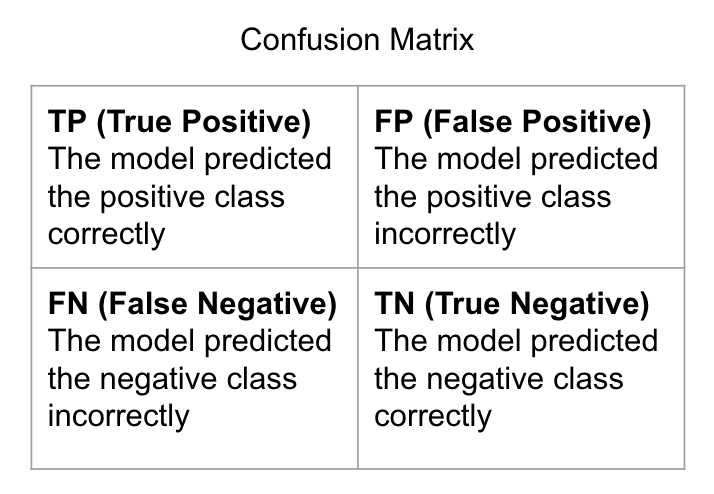
</center>

Some important concepts relavant to the assessment of classification outcomes are:
- **Precision = TP/(TP + FP):** A high precision signifies that when the model predicts a positive class, it's generally accurate.
- **Recall (Sensitivity) = TP/(TP+FN):** A high recall implies the model effectively captures a substantial portion of the positive instances.

In our model, the recall is relatively lower compared to precision, primarily due to a larger number of false negatives. This suggests there's potential for enhancing sensitivity in our model, improving its ability to correctly identify more instances of the positive class.

Another key consideration when working with logistic regression is addressing the issue of imbalanced data. Looking at the confusion matrix, we observe 334 positive instances compared to only 68 negative instances. This imbalance can result in a model that appears to perform well on the majority class but struggles with the minority class.

To address this problem, we can assign class weights during training or leverage models like Random Forest and Gradient Boosting that handle imbalanced data effectively. These strategies enhance model accuracy and fairness.